# Human Development Index and Components

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Read Data

In [96]:
data = pd.read_csv('dataset/Human.csv', encoding='latin-1', delimiter=',', quotechar='"')

In [126]:
data.head()

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,66.933,5.0,3.0
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,64.660,6.0,1.0
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,55.782,11.0,2.0
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,62.607,6.0,4.0
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,49.238,18.0,5.0


In [4]:
data.shape

(195, 12)

In [131]:
data['HUMAN DEVELOPMENT'].value_counts()

VERY HIGH     66
HIGH          49
MEDIUM        44
LOW           32
OTHER          2
Name: HUMAN DEVELOPMENT, dtype: int64

## Analysis Data

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI rank                                195 non-null    int64  
 1   Country                                 195 non-null    object 
 2   HUMAN DEVELOPMENT                       195 non-null    object 
 3   Human Development Index (HDI)           195 non-null    object 
 4   Life expectancy at birth                195 non-null    float64
 5   Expected years of schooling             195 non-null    object 
 6   Mean years of schooling                 195 non-null    object 
 7   Gross national income (GNI) per capita  195 non-null    object 
 8   GNI per capita rank minus HDI rank      195 non-null    object 
 9   HDI rank.1                              195 non-null    object 
 10  Unnamed: 10                             0 non-null      float6

In [6]:
data.describe()

,HDI rank,Life expectancy at birth,Unnamed: 10,Unnamed: 11
count,195.000000,195.000000,0.0,0.0
mean,97.815385,71.277949,NaN,NaN
std,56.467551,7.746484,NaN,NaN
min,1.000000,52.500000,NaN,NaN
25%,49.500000,65.700000,NaN,NaN
50%,97.000000,71.700000,NaN,NaN
75%,146.000000,76.700000,NaN,NaN
max,195.000000,85.900000,NaN,NaN


### Missed Value

In [107]:
data.isnull().values.sum()

2

In [102]:
data.isnull().sum()

HDI rank                                  0
Country                                   0
HUMAN DEVELOPMENT                         0
Human Development Index (HDI)             0
Life expectancy at birth                  0
Expected years of schooling               0
Mean years of schooling                   0
Gross national income (GNI) per capita    0
GNI per capita rank minus HDI rank        0
HDI rank.1                                0
dtype: int64

In [106]:
data = data.fillna(data.median())

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [108]:
data = data.dropna(axis=0)

In [100]:
data.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1, inplace=True)

In [23]:
data['Human Development Index (HDI) ']

0      0.962
1      0.961
2      0.959
3      0.952
4      0.951
       ...  
190    0.385
191      NaN
192      NaN
193      NaN
194      NaN
Name: Human Development Index (HDI) , Length: 195, dtype: object

In [11]:
data.duplicated(keep='first').sum()

0

In [12]:
data.duplicated(keep='last').sum()

0

In [94]:
data

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1


In [17]:
data.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [20]:
data.interpolate(method='linear', inplace=True, axis=0)

In [104]:
data = data.replace("..", np.nan)

### Convert data type

In [109]:
def df_convert_dtype(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [ ]:
data.merge()

In [110]:
numerical_data = data.iloc[:, 3:]

In [121]:
numerical_data.head()

,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1
0,0.962,84.0,16.5,13.9,"66,933",5,3
1,0.961,83.2,18.2,13.0,"64,660",6,1
2,0.959,82.7,19.2,13.8,"55,782",11,2
3,0.952,85.5,17.3,12.2,"62,607",6,4
4,0.951,84.5,21.1,12.7,"49,238",18,5


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 194
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI rank                                193 non-null    int64  
 1   Country                                 193 non-null    object 
 2   HUMAN DEVELOPMENT                       193 non-null    object 
 3   Human Development Index (HDI)           193 non-null    float64
 4   Life expectancy at birth                193 non-null    float64
 5   Expected years of schooling             193 non-null    float64
 6   Mean years of schooling                 193 non-null    float64
 7   Gross national income (GNI) per capita  193 non-null    float64
 8   GNI per capita rank minus HDI rank      193 non-null    float64
 9   HDI rank.1                              193 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.6+ KB


In [113]:
converted_columns = numerical_data.select_dtypes(np.object_).columns

In [114]:
converted_columns

Index(['Human Development Index (HDI) ', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income (GNI) per capita',
       'GNI per capita rank minus HDI rank', 'HDI rank.1'],
      dtype='object')

In [120]:
data['Gross national income (GNI) per capita'] = data['Gross national income (GNI) per capita'].str.replace(',', '.')

In [124]:
data[converted_columns] = df_convert_dtype(data[converted_columns], np.object_, np.float64)

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
numerical_data_cols = numerical_data.columns

In [140]:
corr = data.corr()

### Visualation Data

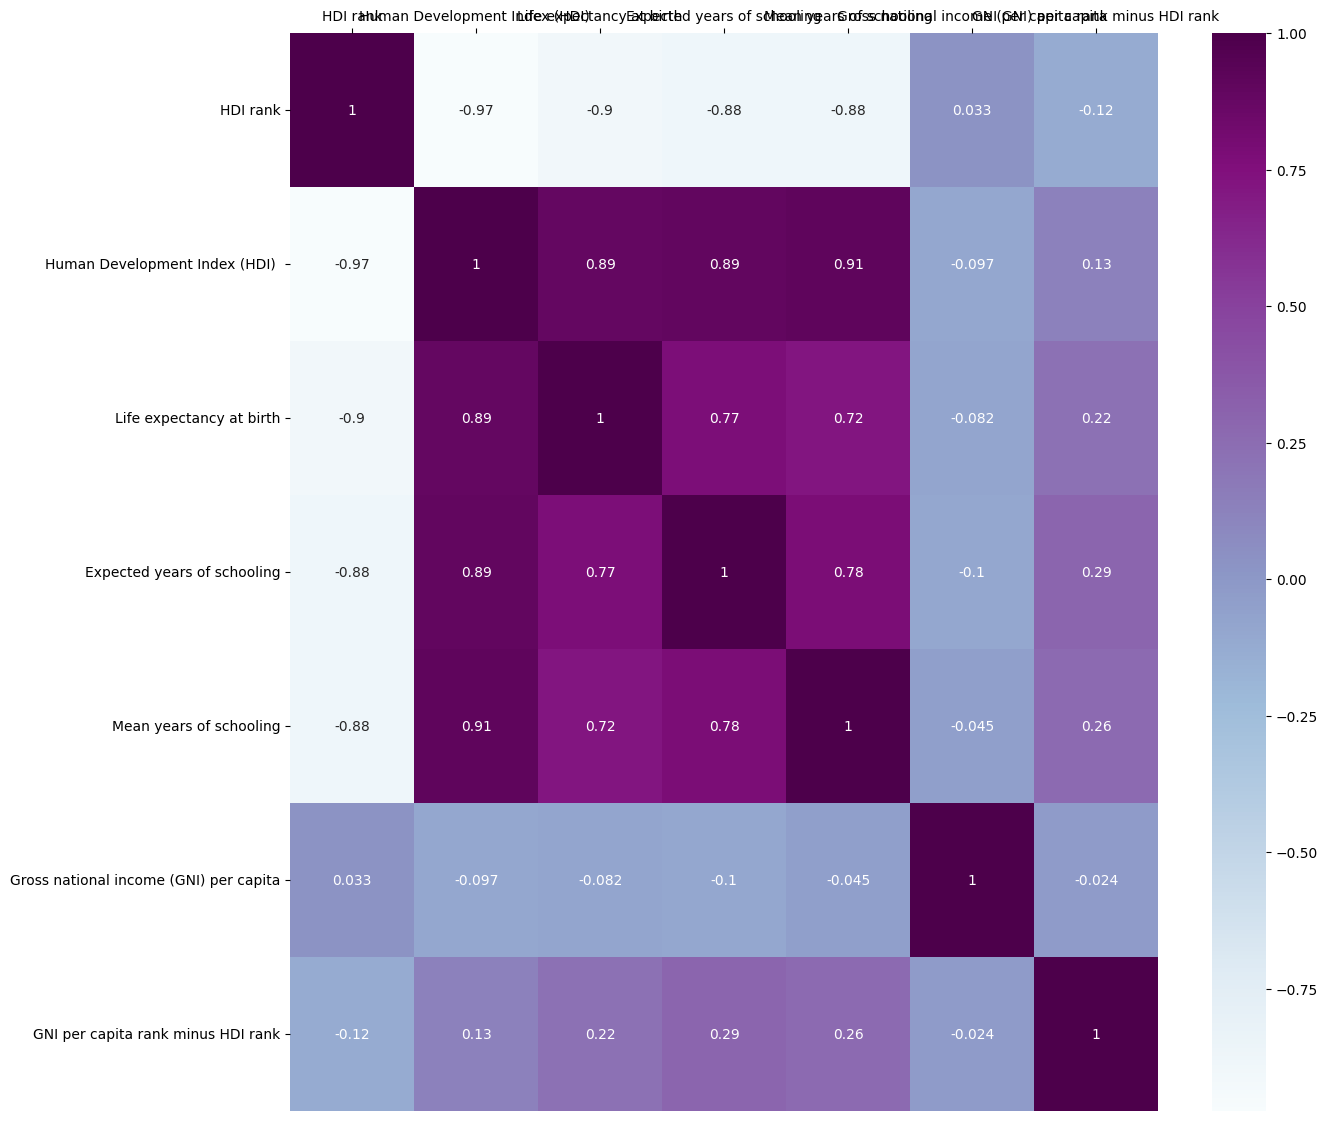

In [141]:
plt.figure(figsize=(14, 14))
ax = sns.heatmap(corr, annot=True, cmap=plt.cm.BuPu)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.show()

In [143]:
data.head()

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,66.933,5.0
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,64.660,6.0
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,55.782,11.0
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,62.607,6.0
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,49.238,18.0


In [137]:
data = data.drop('HDI rank.1', axis=1)

In [142]:
data.set_index('HDI rank')

,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
HDI rank,,,,,,,,
1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,66.933,5.0
2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,64.660,6.0
3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,55.782,11.0
4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,62.607,6.0
5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,49.238,18.0
...,...,...,...,...,...,...,...,...
189,Niger,LOW,0.400,61.6,7.0,2.1,1.240,-3.0
190,Chad,LOW,0.394,52.5,8.0,2.6,1.364,-7.0
191,South Sudan,LOW,0.385,55.0,5.5,5.7,768.000,-1.0
